In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [25]:
import pandas as pd
from datasets import load_dataset

# Veri setini yükleyin
dataset = load_dataset("Andyrasika/banking-marketing")

# Eğitim verisini pandas DataFrame olarak alalım
df = pd.DataFrame(dataset['train'])

# Veriyi sayısal hale getirelim (örneğin, kategorik veriyi one-hot encode yapalım)
df = pd.get_dummies(df, drop_first=True)

# Veri setinin ilk 5 satırını gösterelim
print(df.head())

# veya veri setinin son 5 satırını gösterelim
print(df.tail())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0            False   
1   44       29    5       151         1     -1         0            False   
2   33        2    5        76         1     -1         0            False   
3   47     1506    5        92         1     -1         0             True   
4   33        1    5       198         1     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2              True          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [26]:
# Özellikler ve etiketler
X = df.drop("y_yes", axis=1)  # 'y_yes' etiket kolonunu çıkarıyoruz
y = df["y_yes"]  # Hedef etiket

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sadece ilk 2 özelliği seçelim (karar sınırlarını çizebilmek için 2D uzaya indirgeme)
X_train_2D = X_train.iloc[:, :2]  # İlk 2 özellik
X_test_2D = X_test.iloc[:, :2]    # Test verisinin ilk 2 özelliği

# Özellikleri ölçeklendirelim
scaler = StandardScaler()
X_train_2D = scaler.fit_transform(X_train_2D)
X_test_2D = scaler.transform(X_test_2D)

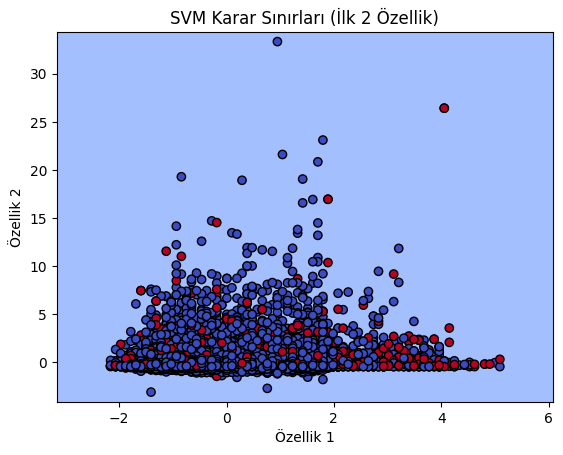

In [27]:
# SVM modelini tanımlayalım ve eğitelim
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_2D, y_train)

# Karar sınırlarını çizmek için, x ve y eksenlerinin meshgrid'ini oluşturuyoruz
h = .02  # grid step size
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Karar sınırlarını hesaplayalım
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Karar sınırlarını çizelim
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM Karar Sınırları (İlk 2 Özellik)")
plt.xlabel("Özellik 1")
plt.ylabel("Özellik 2")
plt.show()

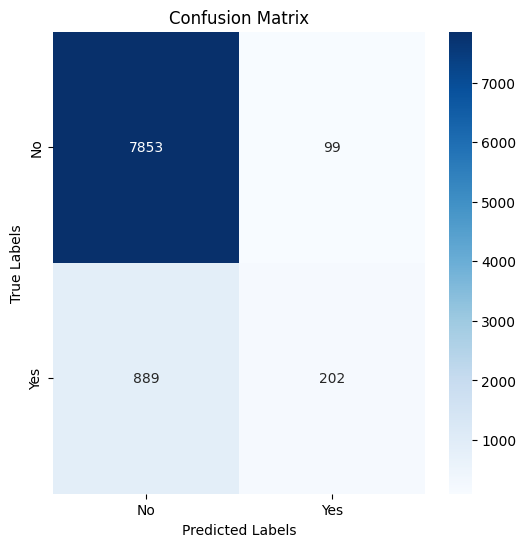

In [30]:
# Confusion matrix'i hesaplayalım
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix'i görselleştirelim
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()